# Теория вероятностей

## Напоминание теории с лекций

**Вероятностное пространство** — это совокупность $(\Omega, \mathcal{F}, \mathbb{P})$, где

1) $\Omega$ — множество элементарных исходов;

2) $\mathcal{F}$ — множество событий (подмножеств $\Omega$);

3) $\mathbb{P}: \mathcal{F} \to [0; 1]$ — вероятность (функция, заданная на множестве событий).

**Пример.**

Рассмотрим одиночное подбрасывание кубика. Пронумеруем его грани числами от 1 до 6. В данном случае:

1) $\Omega = \{ 1, 2, 3, 4, 5, 6\}$. Т.е. элементарный исход — это выпадение одной из граней кубика.

2) $\mathcal{F}$ — подмножества $\Omega$.

$A_1 = \{2, 4, 6\} \in \mathcal{F}$ — событие "выпало чётное число".

$A_2 = \{ 1, 2, 3\} \in \mathcal{F}$ — событие "выпало число меньше 4".

$A_3 = \{ 1 \} \in \mathcal{F}$ — событие "выпало число 1".

3) $\mathbb{P}(w) = \frac{1}{6} \quad \forall$ (для любого) $w \in \Omega$, т.е. выпадение всех граней равновероятно.

### Условная вероятность
Наши представления о том, что случится событие $A$, если мы знаем, что $B$ уже произошло, традиционно вычисляются при помощи понятия **условной вероятности**:

$$\mathbb{P}(A | B) = \frac{\mathbb{P}(A B)}{\mathbb{P}(B)}, (*)$$

где $AB$ - пересечение событий А и B.

**Пример.**

Вычислите вероятность того, что при броске кубика выпало число 2, если известно, что выпало чётное число.

**Решение.**
$$A = \{2 \}, B = \{ 2, 4, 6\}.$$

$$\mathbb{P}(A|B) = \frac{\mathbb{P}(AB)}{\mathbb{P}(B)} = \frac{\mathbb{P}(\{2\})}{\mathbb{P}(\{2, 4, 6\})} = \frac{1 \cdot \frac{1}{6}}{3 \cdot \frac{1}{6}} = \frac{1}{3}. \square$$


### Формула Байеса
Можно записать симметричное выражение, преобразовать его:

$$\mathbb{P}(B | A) = \frac{\mathbb{P}(A B)}{\mathbb{P}(A)},$$
$$\mathbb{P}(A B) = \mathbb{P}(B | A) \mathbb{P}(A)$$
и подставить полученное в (\*):
$$\mathbb{P}(A | B) = \frac{\mathbb{P}(B | A) \mathbb{P}(A)}{\mathbb{P}(B)}$$

Эта формула называется **формулой Байеса**.

### Независимости событий

В теории вероятности пара событий $A$ и $B$ называются независимыми, если выполнено соотношение

$$\mathbb{P}(AB) = \mathbb{P}(A)\mathbb{P}(B).$$

Определение продолжается очевидным образом: $n$ событий $A_1, ..., A_n$ называются независимыми в совокупности, если выполнено

$$\mathbb{P}(A_1 \cdot... \cdot A_n) = \mathbb{P}(A_1)...\mathbb{P}(A_n).$$

## Виды распределений случайных величин

**Случайная величина** — функция $\xi: \Omega \to \mathbb{R},$ обладающая свойством измеримости (что бы это ни значило, не обращайте внимания).

In [27]:
import matplotlib.pyplot as plt
import numpy as np

#### 0. Равномерное распределение

Случайная величина принимает значения из некоторого набора с равными вероятностями.

* Если множество значений конечно, то говорят о дискретном непрерывном распределении.

* В противном случае - о непрерывном равномерном распределении.

In [35]:
s = np.random.uniform(-1,0,1000001)
s

array([-0.06872424, -0.86666196, -0.88004717, ..., -0.52353501,
       -0.16815745, -0.34817644])

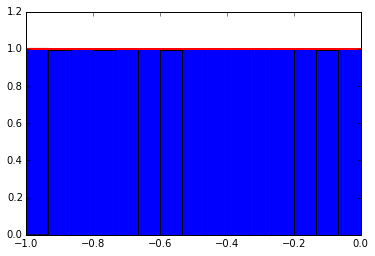

In [36]:
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

#### 1. Распределение Бернулли

$\mathbb{P}(\xi = 1) = p,$

$\mathbb{P}(\xi = 0) = 1 - p.$

$\xi \sim Ber(p)$

Пример: подбрасывание монетки.

In [37]:
from scipy.stats import bernoulli
import numpy as np

p = 0.7
rv = bernoulli(p) # генератор реализаций с.в.

In [40]:
R = bernoulli.rvs(p, size=10000)
R

array([1, 0, 1, ..., 1, 0, 1])

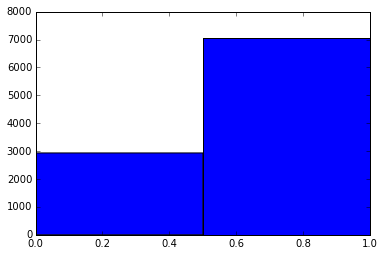

In [41]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(R, bins = 2)
plt.show()

#### 2. Биномиальное распределение

$\xi_i \sim Ber(p),$

$\xi = \sum_{i = 1}^n \xi_i \sim Bi(n, p)$ — биномиальное распределение

In [47]:
n, p = 10, 0.5
s = np.random.binomial(n, p, 10000)
s

array([7, 5, 5, ..., 4, 5, 4])

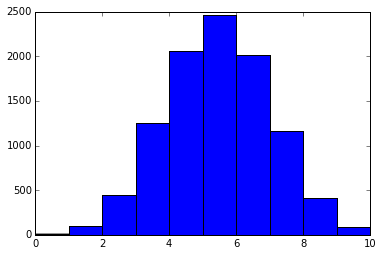

In [48]:
plt.hist(s, bins = 10)
plt.show()

#### 3. Нормальное распределение

$\xi \sim \mathcal{N} (\mu, \sigma^2)$

Плотность нормального распределения:
$$p(x; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(x- \mu)^2}{2 \sigma^2}}$$

In [49]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

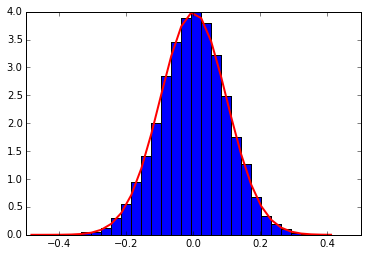

In [50]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

## Метод максимального правдоподобия

Пусть имеется некоторая выборка $x_1, x_2, ..., x_n$ из заданного распределения с неизвестным(и) параметром(ами). Как оценить значение параметра?

$$L(x_1, ..., x_n| \theta) \to \max_{\theta},$$

где $L(...)$ — функция правдоподобия выборки, $\theta$ — параметр(ы), который необходимо найти.

Предположим, что выборка независимая. Тогда функция правдоподобия запишется следующим образом:

$$L(x_1, ..., x_n| \theta) = \prod_{i = 1}^n p(x_i|\theta).$$

Чаще всего вместо задачи максимизации функции правдопобия удобнее решать задачу максимизации её логарифма:
$$\ln L(x_1, ..., x_n| \theta)  = \sum_{i = 1}^n \ln p(x_i|\theta) \to \max_{\theta},$$

**Пример.**

Пусть имеется выборка $x_1, ..., x_n$ из нормального распределения. Найдите оценку максимального правдоподобия параметров $\mu, \sigma.$

**Решение.**

Запишем логарифм функции правдоподобия для нормального распределения:

$L(x_1, ... x_n|\mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp (- \frac{(x_i - \mu)^2}{2 \sigma^2}),$

$\ln L(x_1, ... x_n|\mu, \sigma) = \sum_{i=1}^n ( - \frac{1}{2} \ln 2 \pi - \ln \sigma - \frac{1}{2 \sigma^2} (x_i - \mu)^2) = -\frac{n}{2} \ln 2 \pi - n \ln \sigma - \frac{1}{2 \sigma^2} \sum_{i = 1}^n (x_i - \mu)^2.$

Как искать минимум? Необходимое условие минимума функции $f(x)$ в точке $a$: $\frac{\partial f}{\partial x} (a) = 0.$

\begin{cases}
\frac{\partial}{\partial \mu}  ln L(x_1, ..., x_n|\mu_{ML}, \sigma_{ML}) = 0,\\
\frac{\partial}{\partial \sigma} ln L(x_1, ..., x_n|\mu_{ML}, \sigma_{ML})   = 0.
\end{cases}

1) $\frac{\partial}{\partial \mu}  ln L(x_1, ..., x_n|\mu_{ML}, \sigma_{ML}) = - 0 - 0 - (-1) \cdot \frac{1}{2 \sigma_{ML}^2} \sum_{i = 1}^n 2 (x_i - \mu_{ML}) = \frac{1}{\sigma_{ML}^2} \sum_{i = 1}^n (x_i - \mu_{ML}) = 0.$

$\sum_{i=1}^n x_i - n \mu_{ML} = 0$

$\sum_{i=1}^n x_i = n \mu_{ML}$

$\mu_{ML} = \frac{1}{n} \sum_{i=1}^n x_i$

2) $\frac{\partial}{\partial \sigma}  ln L(x_1, ..., x_n|\mu_{ML}, \sigma_{ML}) = - 0 - \frac{n}{\sigma_{ML}} - \frac{1}{2} \cdot (-2) \frac{1}{\sigma_{ML}^3} \sum_{i = 1}^n (x_i - \mu_{ML})^2 = - \frac{n}{\sigma_{ML}} + \frac{1}{\sigma_{ML}^3} \sum_{i = 1}^n (x_i - \mu_{ML})^2 = 0$

$\frac{1}{\sigma_{ML}^2} \sum_{i = 1}^n (x_i - \mu_{ML})^2 = n$

$\sigma_{ML}^2 = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu_{ML})^2$